<a href="https://colab.research.google.com/github/Cloudum08/DSBDA-Lab/blob/main/DSBDAL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a **Linear Regression** Model using Python/R to predict
home prices using Boston Housing Dataset

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


Loading the Dataset, checking for null values and preprocessing data



In [ ]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv ('/content/drive/MyDrive/TE/Colab Notebooks/Datasets/housing.csv', header = None, names = col_names, delimiter = r"\s+")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.notnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Split dependent (y) variable and independent (x) variables as y = mx + c

In [ ]:
x = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

Splitting data to training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

Use linear regression( Train the Machine ) to Create Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
# fit the model
model=lm.fit(xtrain, ytrain)

Predict the y_pred for all values of train_x and test_x

In [ ]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

Evaluate the performance of Model for train_y and test_y

In [ ]:
df1 = pd.DataFrame(ytrain_pred,ytrain)
df2 = pd.DataFrame(ytest_pred,ytest)

In [ ]:
df1

,0
MEDV,
26.7,32.556927
21.7,21.927095
22.0,27.543826
22.9,23.603188
10.4,6.571910
...,...
18.5,19.494951
36.4,33.326364
19.2,23.796208


In [ ]:
df2

,0
MEDV,
22.6,24.889638
50.0,23.721411
23.0,29.364999
8.3,12.122386
21.2,21.443823
...,...
24.7,25.442171
14.1,15.571783
18.7,17.937195


Calculate Mean Square Paper for train_y and test_y

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.44897999767639


In [ ]:
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

19.326470203585725


Plotting the linear regression model

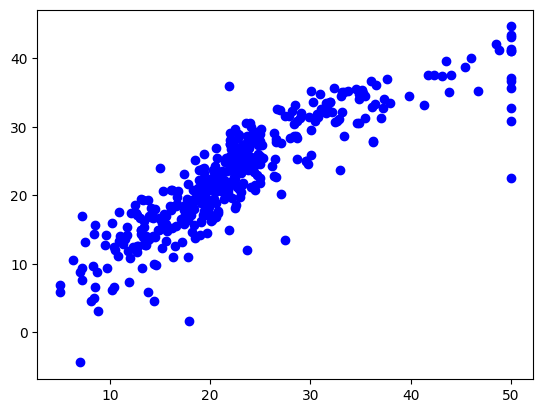

In [ ]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')


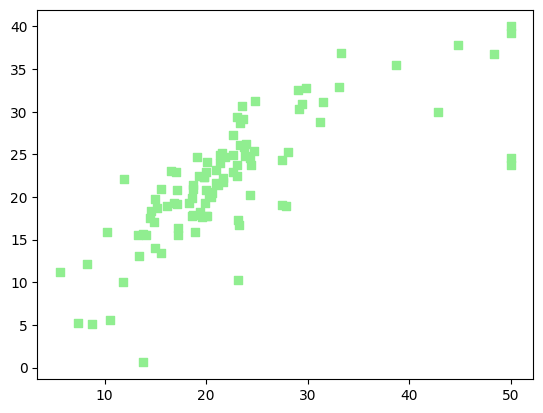

In [ ]:
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')

Text(0.5, 0, 'True values')

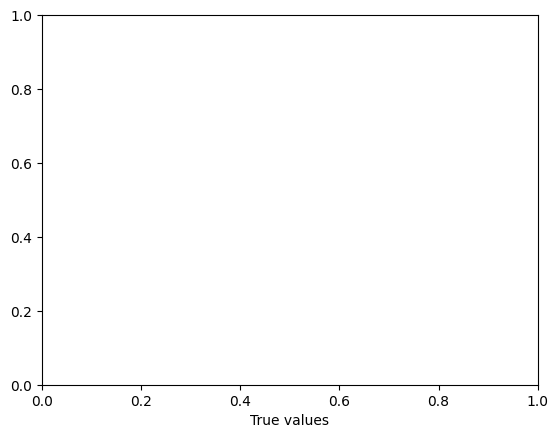

In [ ]:
plt.xlabel('True values')

Text(0, 0.5, 'Predicted')

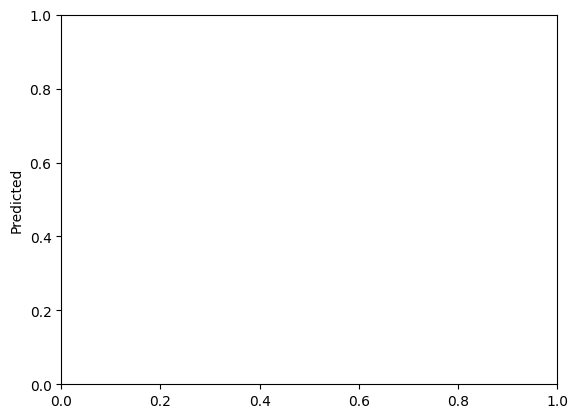

In [ ]:
plt.ylabel('Predicted')

Text(0.5, 1.0, 'True value vs Predicted value')

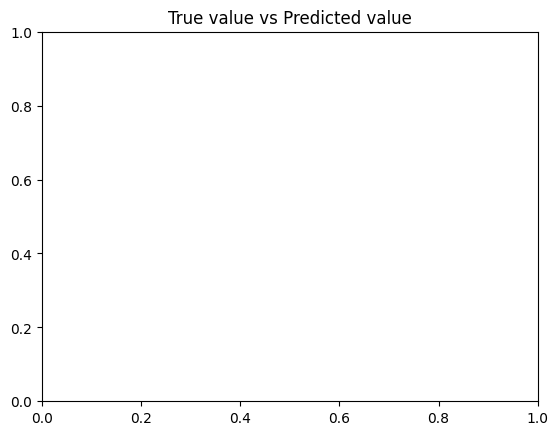

In [ ]:
plt.title("True value vs Predicted value")

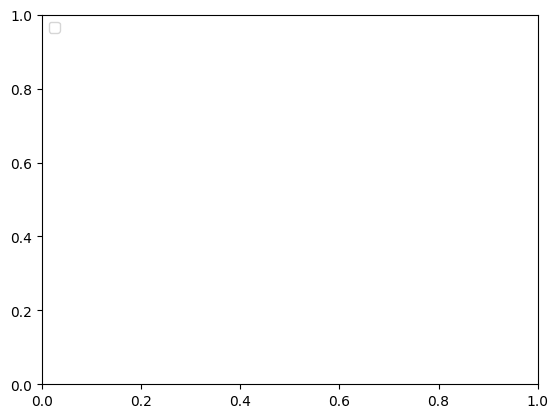

In [ ]:
plt.legend(loc= 'upper left')

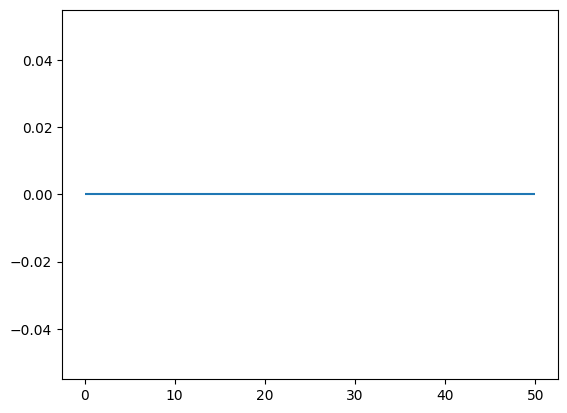

In [ ]:
plt.hlines(y=0,xmin=0,xmax=50)

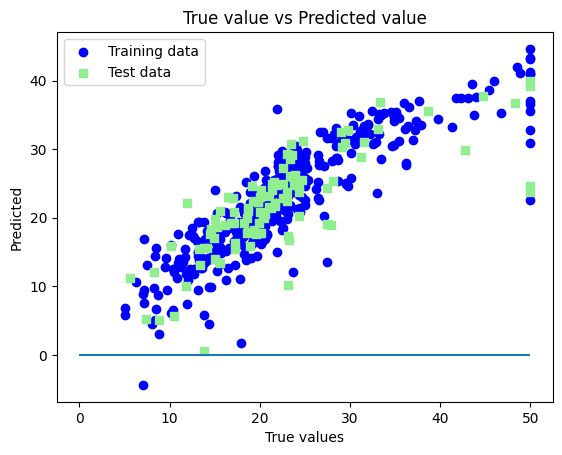

In [ ]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()

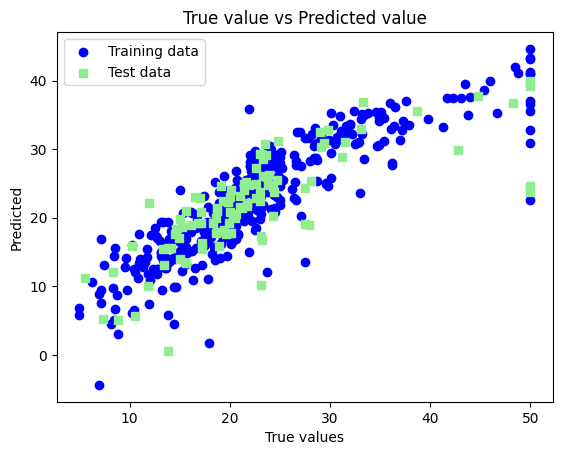

In [ ]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()

**Conclusion**: data analysis using linear regression for Boston Dataset and predict the price of houses using the features of the Boston Dataset has been done successfully.

TEST CASES:

In [ ]:
x1 = df.drop(['MEDV','AGE', 'ZN'], axis=1)
y1 = df['MEDV']
x1train, x1test, y1train, y1test = train_test_split(x1,y1, test_size=0.2, random_state=0)
model = lm.fit(x1train, y1train)
y1train_predict = lm.predict(x1train)
y1test_predict = lm.predict(x1test)

In [ ]:
mse_train = mean_squared_error(y1train, y1train_predict)
mse_train

19.82688747948868

In [ ]:
mse_test = mean_squared_error(y1test, y1test_predict)
mse_test

34.05875247632637

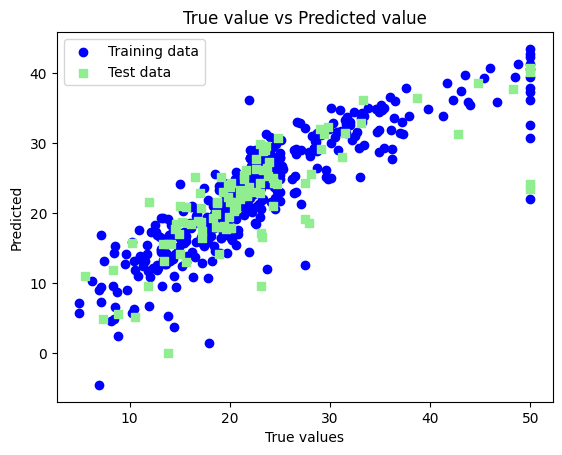

In [ ]:
plt.scatter(y1train ,y1train_predict,c='blue',marker='o',label='Training data')
plt.scatter(y1test,y1test_predict ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()

In [ ]:
x1 = df.drop(['MEDV','AGE', 'ZN', 'NOX'], axis=1)
y1 = df['MEDV']
x1train, x1test, y1train, y1test = train_test_split(x1,y1, test_size=0.2, random_state=0)
model = lm.fit(x1train, y1train)
y1train_predict = lm.predict(x1train)
y1test_predict = lm.predict(x1test)

In [ ]:
mse_train = mean_squared_error(y1train, y1train_predict)
mse_train

20.773890874497237

In [ ]:
mse_test = mean_squared_error(y1test, y1test_predict)
mse_test

36.31028539535624

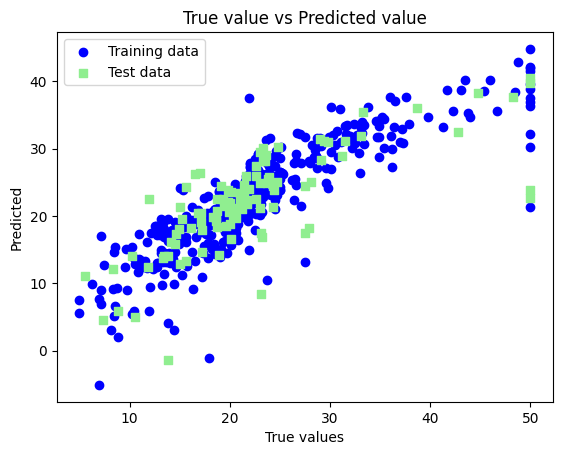

In [ ]:
plt.scatter(y1train ,y1train_predict,c='blue',marker='o',label='Training data')
plt.scatter(y1test,y1test_predict ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()